# Week 4: Supervised learning II: Classification
<font color='#AC135A'>**Applied Machine Learning** - **Sheffield Hallam University**</font>


---

## Introduction
This notebook contains 30 exercises covering classification from three  lenses: Probabilistic, Geometric (boundary), and Partition-based, using synthetic data and the libraries we use in this module: Pandas, NumPy, and scikit-learn.

---

## Section 1: Decision Boundary Visualization (Geometric Lens)

### Exercise 1: Interactive Linear Boundary

**Explanation:** Plot 2D points from two classes and overlay a manual decision line \(w_1 x_1 + w_2 x_2 + b = 0\). Learn how slope/intercept define a separating line.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Generate synthetic data
rng = np.random.RandomState(0)
X = rng.randn(100,2)
y = (X[:,0] + X[:,1] > 0).astype(int)

# Plot function
def plot_boundary(w1=1.0, w2=-1.0, b=0.0):
    plt.figure(figsize=(5,5))
    plt.scatter(X[y==0,0], X[y==0,1], label='Class 0')
    plt.scatter(X[y==1,0], X[y==1,1], label='Class 1')
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = -(w1*x_vals + b)/w2
    plt.plot(x_vals, y_vals, 'k--')
    plt.legend()
    plt.title(f'Boundary: {w1:.2f}x₁ + {w2:.2f}x₂ + {b:.2f}=0')
    plt.show()

interactive(plot_boundary, w1=(-3,3,0.1), w2=(-3,3,0.1), b=(-5,5,0.5))


interactive(children=(FloatSlider(value=1.0, description='w1', max=3.0, min=-3.0), FloatSlider(value=-1.0, des…

**Task:** Move the sliders to see how the line shifts and separates classes. Describe which settings maximize margin.

---

### Exercise 2: Meshgrid Decision Region

**Explanation:** Compute predicted labels on a grid and plot colored decision regions for a given ω and b.

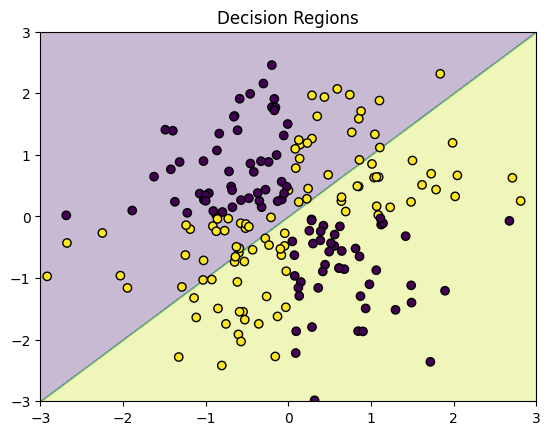

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def plot_region(w1=1.0, w2=-1.0, b=0.0):
    xx, yy = np.meshgrid(np.linspace(-3,3,200), np.linspace(-3,3,200))
    Z = (w1*xx + w2*yy + b > 0).astype(int)
    plt.contourf(xx, yy, Z, alpha=0.3) # This allows us to visualize the partition
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title('Decision Regions')
    plt.show()

plot_region()


**Task:** Change parameters and observe region shapes.

---

### Exercise 3: Nonlinear Boundary Function

**Explanation:** Visualize a quadratic boundary $x_1^2 + x_2^2 - r^2=0$ to illustrate non-linear separation.

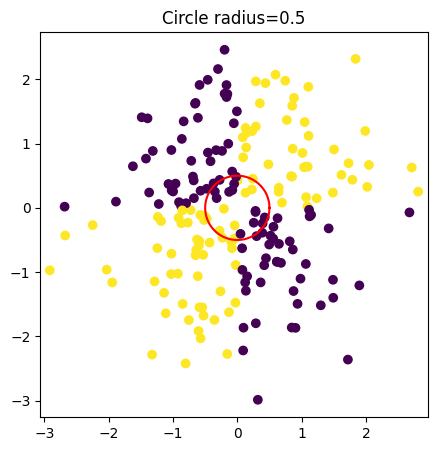

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def plot_circle(r=0.50):
    theta = np.linspace(0,2*np.pi,200)
    plt.figure(figsize=(5,5))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(r*np.cos(theta), r*np.sin(theta),'r-') # Plotting a circular boundary
    plt.title(f'Circle radius={r}')
    plt.axis('equal')
    plt.show()

plot_circle()


**Task:** Modify r and describe class separation.

---

## Section 2: Logistic Regression (Probabilistic Lens)

### Exercise 4: Sigmoid Function Plot

**Explanation:** Implement and plot the sigmoid function to understand probability mapping.

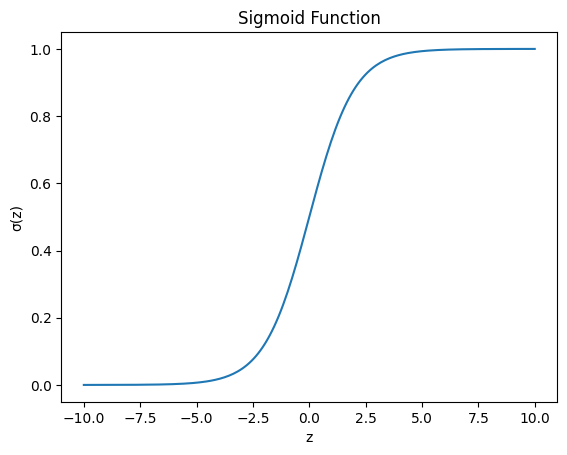

In [70]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10,10,200)
plt.plot(z, sigmoid(z))
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('\u03c3(z)')
plt.show()


**Task:** Explain why outputs near 0 or 1 reflect high confidence.

---

### Exercise 5: Fit Logistic Regression

**Explanation:** Generate separable 2D data, fit scikit-learn’s LogisticRegression, and plot boundary.

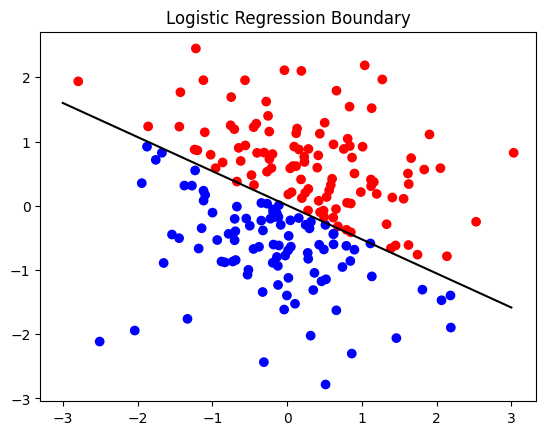

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

rng = np.random.RandomState(1)
X = rng.randn(200,2)
y = (X[:,0] + 2*X[:,1] > 0).astype(int)
model = LogisticRegression().fit(X, y)
w, b = model.coef_[0], model.intercept_[0]

# Plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
# Plot boundary
xx = np.array([-3,3])
yy = -(w[0]*xx + b)/w[1]
plt.plot(xx, yy,'k-')
plt.title('Logistic Regression Boundary')
plt.show()


**Task:** Report model accuracy and interpret coefficients.

---

### Exercise 6: Probability Contours

**Explanation:**
After fitting a logistic regression model, each point is assigned a probability of belonging to the positive class. In this exercise, you will:

- Create a fine grid of feature values covering the input space.

- Use predict_proba to compute the model’s estimated probability for each grid point.

- Draw contour lines at probability levels 0.25, 0.50, and 0.75.

These contours illustrate regions of low, medium, and high confidence. The 0.5 contour corresponds to the decision boundary, while the 0.25 and 0.75 lines show how quickly confidence falls off or increases. Examining these curves helps you understand how logistic regression transitions between classes and how sharply or smoothly it makes decisions.

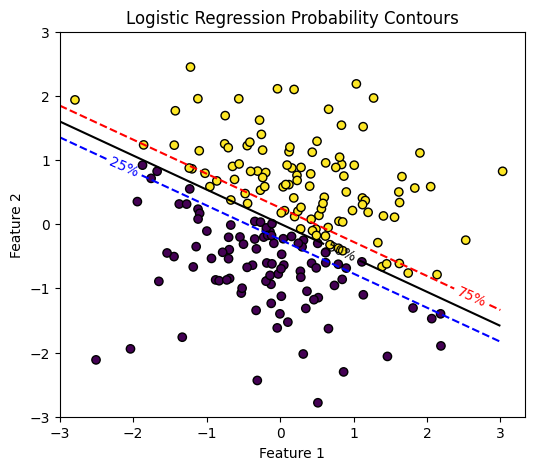

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid of values
xx, yy = np.meshgrid(
    np.linspace(-3, 3, 200),
    np.linspace(-3, 3, 200)
)
# Compute predicted probability for positive class
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

# Plot contour lines at key probability thresholds
plt.figure(figsize=(6,5))
contours = plt.contour(
    xx, yy, Z,
    levels=[0.25, 0.5, 0.75],
    colors=['blue', 'black', 'red'],
    linestyles=['--', '-', '--']
)
plt.clabel(contours, fmt={0.25: '25%', 0.5: '50%', 0.75: '75%'})
# Overlay data points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Probability Contours')
plt.show()


**Task:** Explain contour spacing in terms of confidence.

---

## Section 3: Support Vector Machines (Geometric Lens)

### Exercise 7: Hard-Margin SVM

**Explanation:** Fit an SVM without slack (large C) to linearly separable data and plot margin lines.

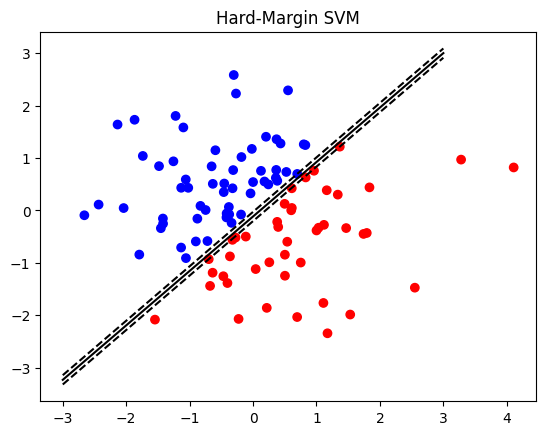

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

rng = np.random.RandomState(2)
X = rng.randn(100,2)
y = (X[:,0] - X[:,1] > 0).astype(int)
model = SVC(kernel='linear', C=1e6).fit(X, y)

# Plot
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
w = model.coef_[0]
b = model.intercept_[0]
# Margin lines
xx = np.linspace(-3,3)
y0 = -(w[0]*xx + b)/w[1]
plt.plot(xx, y0,'k-')
plt.plot(xx, -(w[0]*xx + b-1)/w[1],'k--')
plt.plot(xx, -(w[0]*xx + b+1)/w[1],'k--')
plt.title('Hard-Margin SVM')
plt.show()


**Task:** Identify support vectors from `model.support_vectors_` and mark them.

---

### Exercise 8: Soft-Margin vs Hard-Margin

**Explanation:** Vary C to see tradeoff between margin width and misclassification.

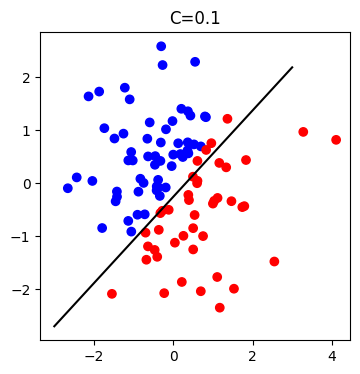

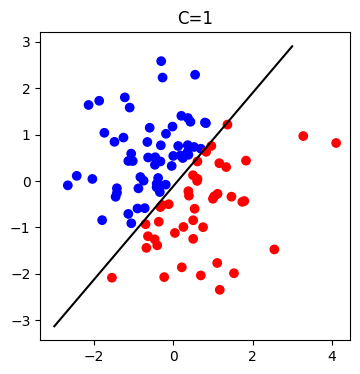

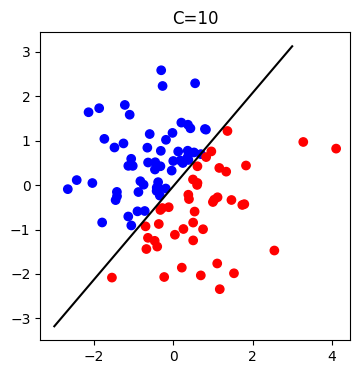

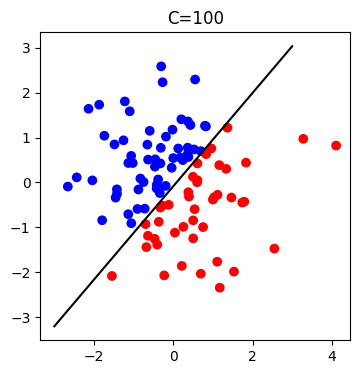

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Task: Regenerate the synthetic data to make it harder to separate

for C in [0.1,1,10,100]:
    model = SVC(kernel='linear', C=C).fit(X, y)
    plt.figure(figsize=(4,4))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')
    w, b = model.coef_[0], model.intercept_[0]
    xx = np.linspace(-3,3)
    yy = -(w[0]*xx + b)/w[1]
    plt.plot(xx, yy,'k-')
    plt.title(f'C={C}')
    plt.show()


**Task:** Describe how boundary changes with C.

---

### Exercise 9: Kernel Trick Demo

**Explanation:** Generate concentric circles, fit linear vs RBF SVM, and compare.

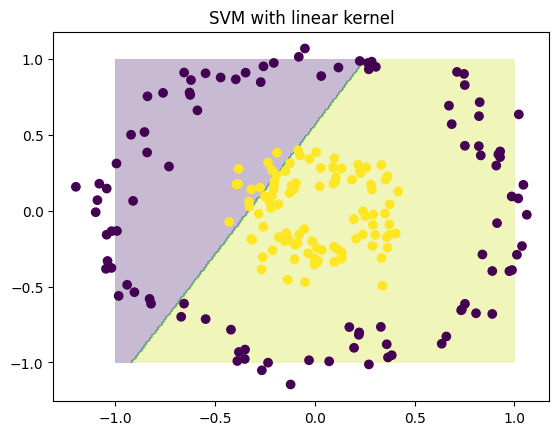

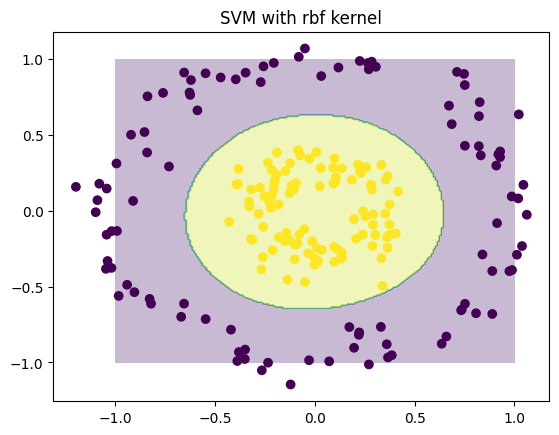

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.datasets import make_circles
Xc, yc = make_circles(n_samples=200, factor=0.3, noise=0.1)

for kernel in ['linear', 'rbf']:
    model = SVC(kernel=kernel, C=1).fit(Xc, yc)
    xx, yy = np.meshgrid(np.linspace(-1,1,200), np.linspace(-1,1,200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(Xc[:,0], Xc[:,1], c=yc)
    plt.title(f'SVM with {kernel} kernel')
    plt.show()


**Task:** Explain why RBF succeeds where linear fails.

---

## Section 4: Decision Trees & Ensembles (Partition Lens)

### Exercise 10: Decision Tree Visualization

**Explanation:** Fit a shallow DecisionTreeClassifier and plot decision regions.

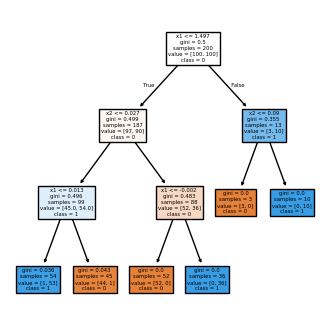

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Task: Regenerate the synthetic data to make it harder to separate or use a kaggle dataset

rng = np.random.RandomState(3)
X = rng.randn(200,2)
y = (X[:,0]*X[:,1] > 0).astype(int)
model = DecisionTreeClassifier(max_depth=3).fit(X, y)

plt.figure(figsize=(4,4))
plot_tree(model, feature_names=['x1','x2'], class_names=['0','1'], filled=True)
plt.show()


**Task:** Interpret how the tree partitions feature space.

---

### Exercise 11: Random Forest vs Single Tree

**Explanation:** Compare stability and accuracy of RandomForestClassifier vs single tree.

In [41]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Task: Regenerate the synthetic data to make it harder to separate

rf = RandomForestClassifier(n_estimators=50).fit(X, y)
tree = DecisionTreeClassifier().fit(X, y)
print('Tree Acc:', accuracy_score(y, tree.predict(X)))
print('RF Acc:', accuracy_score(y, rf.predict(X)))


Tree Acc: 1.0
RF Acc: 1.0


**Task:** Plot feature importances from both models and discuss differences.

---

### Exercise 12: Gradient Boosting Classification

**Explanation:** Fit GradientBoostingClassifier and visualize loss vs trees.

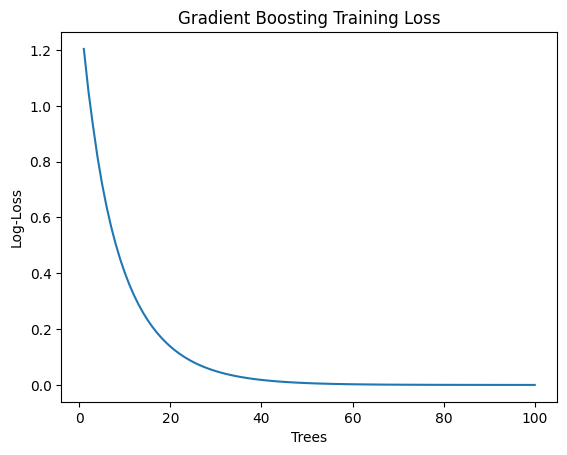

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb.fit(X, y)

plt.plot(np.arange(1,101), gb.train_score_, label='Train Loss')
plt.xlabel('Trees')
plt.ylabel('Log-Loss')
plt.title('Gradient Boosting Training Loss')
plt.show()


**Task:** Experiment with `learning_rate` and `n_estimators` to observe overfitting.

---

## Section 5: Loss Functions & Cross-Validation

### Exercise 13: 0-1 vs Log Loss

**Explanation:** Plot 0-1 loss vs log loss as functions of predicted probability. In classification, different loss functions capture different notions of error:

- 0-1 Loss: A binary, discontinuous loss that assigns a penalty of 1 for any misclassification and 0 for correct classification. It treats all errors equally, regardless of confidence, and is not differentiable—making it unsuitable for gradient-based optimization.

- Logistic (Log) Loss: A smooth, convex surrogate that penalizes misclassifications based on confidence. For a true label y=1 and predicted probability p, the log loss is -\log(p).

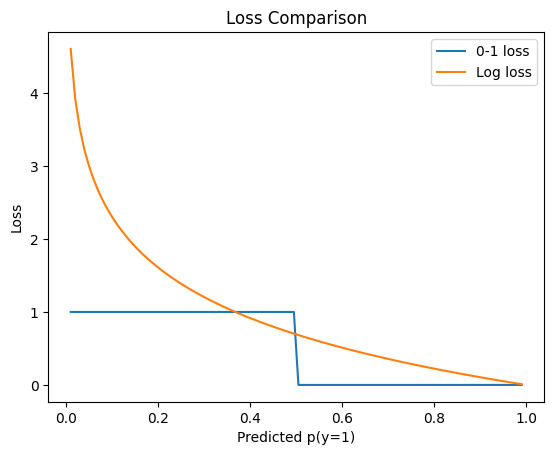

In [43]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0.01, 0.99, 100)
zero_one = (p < 0.5).astype(int)
log_loss = - (np.log(p)*(1) + np.log(1-p)*0)  # for y=1

plt.plot(p, zero_one, label='0-1 loss')
plt.plot(p, log_loss, label='Log loss')
plt.xlabel('Predicted p(y=1)')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')
plt.show()


**Task:** Explain why log loss penalizes low-confidence errors more.

---

### Exercise 14: ROC and AUC

**Explanation:** Compute ROC curve and AUC for logistic model.

AUC: 0.99505


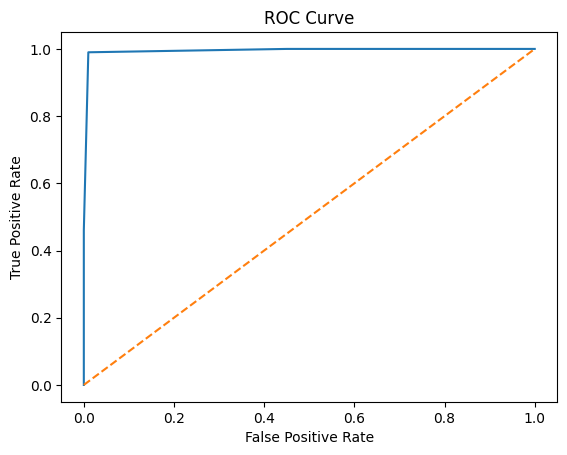

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

probs = model.predict_proba(X)[:,1]
fpr, tpr, _ = roc_curve(y, probs)
print('AUC:', roc_auc_score(y, probs))

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


**Task:** Interpret ROC shape and AUC value. Modify the data to make it harder to solve and compare the resulting ROC.

---

### Exercise 15: Precision-Recall Tradeoff

**Explanation:** Plot precision-recall curve and compute average precision.

AP: 0.9915965517241381


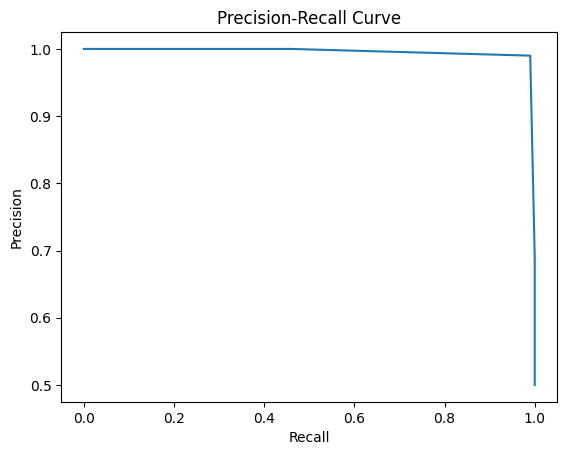

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y, probs)
print('AP:', average_precision_score(y, probs))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


**Task:** Discuss when PR curve is more informative than ROC.

---

## Section 6: Model Selection & Hyperparameter Tuning

### Exercise 16: K-Fold CV

**Explanation:** Implement manual K-fold cross-validation for logistic regression.

In [46]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
accs = []
for train_idx, test_idx in kf.split(X):
    m = LogisticRegression().fit(X[train_idx], y[train_idx])
    accs.append(m.score(X[test_idx], y[test_idx]))
print('CV Accuracies:', accs)
print('Mean CV Acc:', np.mean(accs))


CV Accuracies: [0.3, 0.35, 0.4, 0.4, 0.375]
Mean CV Acc: 0.36499999999999994


**Task:** Compare manual CV to `cross_val_score`.

---

### Exercise 17: Grid Search

**Explanation:** Use `GridSearchCV` to tune `C` and `penalty` for logistic regression.

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,0.1,1,10], 'penalty': ['l1','l2']}
gs = GridSearchCV(LogisticRegression(solver='saga'), param_grid, cv=5)
gs.fit(X, y)
print('Best Params:', gs.best_params_)


Best Params: {'C': 0.01, 'penalty': 'l1'}


**Task:** Plot heatmap of CV scores across grid.

---

### Exercise 18: Nested CV

**Explanation:** Perform nested cross-validation to estimate generalization error.

In [48]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

param_grid = {'C': [0.1,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=3)
nested_scores = cross_val_score(grid, X, y, cv=5)
print('Nested CV scores:', nested_scores)
print('Mean:', np.mean(nested_scores))


Nested CV scores: [0.475 0.525 0.425 0.475 0.375]
Mean: 0.45499999999999996


**Task:** Explain purpose of nested CV vs simple CV.

---

## Section 7: Advanced Partition Methods

### Exercise 19: K-Nearest Neighbors

**Explanation:** Fit KNN classifier and plot decision boundary for different k.

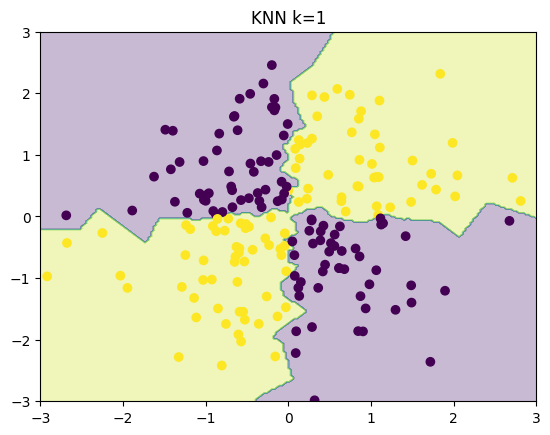

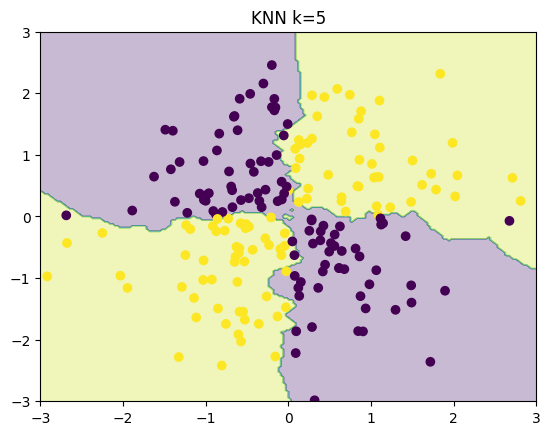

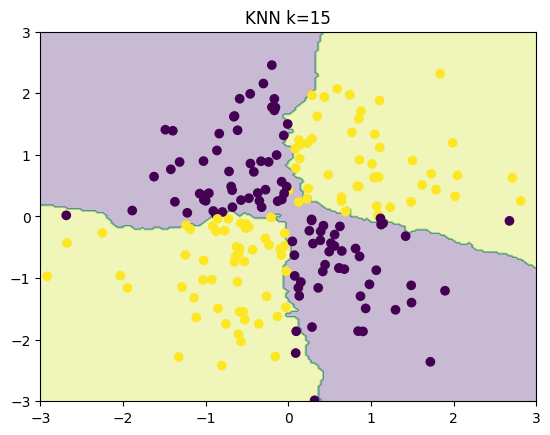

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

for k in [1,5,15]:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X, y)
    xx, yy = np.meshgrid(np.linspace(-3,3,200), np.linspace(-3,3,200))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(f'KNN k={k}')
    plt.show()


**Task:** Discuss bias-variance tradeoff as k changes.

---

### Exercise 20: Naive Bayes Classifier

**Explanation:** (Advanced) Fit GaussianNB and compare to logistic regression on the same data.

The Gaussian Naive Bayes classifier models each feature’s distribution per class as a Gaussian and applies Bayes’ theorem under the conditional independence assumption. Key points:

- Generative vs Discriminative: Unlike logistic regression (a discriminative model), Naive Bayes learns the joint probability , then infers .

- Conditional Independence: Assumes features are independent given the class label, simplifying likelihood to a product of univariate Gaussians.

- Priors: Class priors  are estimated from class frequencies, biasing decisions toward more common classes if data is imbalanced.

- Decision Boundary: Results in quadratic boundaries when covariances differ, but simplifies to linear when all classes share variance.


In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X, y)
print('NB Acc:', nb.score(X, y))
print('LR Acc:', LogisticRegression().fit(X, y).score(X, y))


NB Acc: 0.535
LR Acc: 0.52


**Task:** Plot predicted probability heatmaps for both models.

---

## Section 8: Ensemble Learning & Bagging

### Exercise 21: Bagging Classifier

**Explanation:** Fit BaggingClassifier with decision trees and analyze OOB error.

In [51]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=100, oob_score=True).fit(X, y)
print('OOB Score:', bag.oob_score_)


OOB Score: 0.985


**Task:** Explain how OOB approximates test error.

---

### Exercise 22: AdaBoost

**Explanation:** Fit AdaBoostClassifier and examine how weak learners combine.

In [52]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=50).fit(X, y)
print('Training Acc:', adb.score(X, y))


Training Acc: 0.655


**Task:** Plot feature importances (stump weights).

---

### Exercise 23: Voting Classifier

**Explanation:** Combine heterogeneous classifiers via majority vote.

In [53]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier().fit(X, y)
clf3 = GaussianNB().fit(X, y)
vot = VotingClassifier([('lr',clf1),('knn',clf2),('nb',clf3)]).fit(X, y)
print('Voting Acc:', vot.score(X, y))


Voting Acc: 0.705


**Task:** Compare individual vs ensemble accuracy.

---

## Section 9: Calibration & Final Evaluation

### Exercise 24: Probability Calibration

**Explanation:** (Advanced) Evaluate and calibrate probabilities with isotonic and sigmoid methods.

Predicted probabilities from classifiers can be poorly calibrated—overconfident or underconfident in their actual accuracy. Calibration aligns predicted probabilities with observed frequencies, making them reliable for decision-making (e.g., risk assessment). This exercise will:

- Compute Calibration Curve: Use calibration_curve to bin predictions and compare average predicted probability vs. true positive rate in each bin.

Apply Calibration Methods:

- Platt Scaling (sigmoid): Fits a logistic regression on the model’s scores to adjust probabilities.

- Isotonic Regression: Uses a non-parametric piecewise constant function to map scores to probabilities.

Evaluate Calibration:

- Reliability Diagram: Plot predicted vs. observed probabilities; perfect calibration lies on the diagonal.

- Brier Score: Compute mean squared error between predicted probabilities and true outcomes.

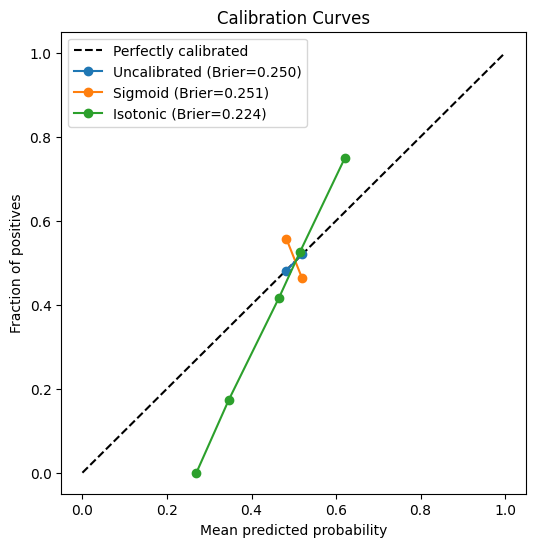

In [54]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# Attention: If you changed X,y from before, you might need to regenerate

# Base classifier
clf = LogisticRegression().fit(X, y)
# Calibrated classifiers
sigmoid_calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=5).fit(X, y)
iso_calibrated = CalibratedClassifierCV(clf, method='isotonic', cv=5).fit(X, y)

# Helper to plot calibration
def plot_calibration(model, label):
    probs = model.predict_proba(X)[:,1]
    frac_pos, mean_pred = calibration_curve(y, probs, n_bins=10)
    plt.plot(mean_pred, frac_pos, marker='o', label=f'{label} (Brier={brier_score_loss(y, probs):.3f})')

plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k--', label='Perfectly calibrated')
plot_calibration(clf, 'Uncalibrated')
plot_calibration(sigmoid_calibrated, 'Sigmoid')
plot_calibration(iso_calibrated, 'Isotonic')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curves')
plt.legend()
plt.show()

**Task:** Plot calibration curves before/after. Did the calibration improve the original output? (sometimes it doesn't)

---

### Exercise 25: Cost-Sensitive Learning

**Explanation:** Modify decision threshold or class weights to penalize false negatives more heavily.

In many real-world applications, different types of classification errors carry different costs. For example, in medical diagnosis, a false negative (missing a disease) is typically far more costly than a false positive (unnecessary further testing). Cost-sensitive learning allows you to incorporate these imbalances directly into model training.

Two common approaches:

- Class Weights: Assign higher weight to the minority or more critical class during training. The classifier minimizes a weighted loss, treating errors on the costly class as more significant.

- Decision Threshold Adjustment: After training a probabilistic classifier, choose a classification threshold other than 0.5 to trade precision vs. recall according to cost preferences.

In [55]:
clf = LogisticRegression(class_weight={0:1,1:5}).fit(X, y)
print('Weighted Acc:', clf.score(X, y))


Weighted Acc: 0.5


**Task:** Plot confusion matrices for default vs weighted.

---

## Section 10: Practical Comparative Study

### Exercise 26: Timing & Scalability

**Explanation:** Measure training and prediction time of Logistic, SVM, RandomForest on increasing dataset sizes.

In [56]:
import time
sizes = [100,500,1000,5000]
for n in sizes:
    Xn = rng.randn(n,2)
    yn = (Xn[:,0]+Xn[:,1]>0).astype(int)
    for name, cls in [('LR',LogisticRegression()),('SVM',SVC()),('RF',RandomForestClassifier())]:
        t0 = time.time()
        m = cls.fit(Xn, yn)
        t1 = time.time()
        print(n, name, 'train:', t1-t0)


100 LR train: 0.0014920234680175781
100 SVM train: 0.0006840229034423828
100 RF train: 0.049269914627075195
500 LR train: 0.0007798671722412109
500 SVM train: 0.0006587505340576172
500 RF train: 0.03995180130004883
1000 LR train: 0.0008211135864257812
1000 SVM train: 0.0016672611236572266
1000 RF train: 0.050650835037231445
5000 LR train: 0.0018911361694335938
5000 SVM train: 0.01898813247680664
5000 RF train: 0.1670999526977539


**Task:** Summarize which algorithm scales best.

---

### Exercise 27: Feature Selection Effects

**Explanation:** Add redundant/noisy features and measure model performance drop.

In [57]:
# Append random noise features
X_aug = np.hstack([X, rng.randn(200,10)])
print('LR acc orig:', LogisticRegression().fit(X, y).score(X, y))
print('LR acc aug:', LogisticRegression().fit(X_aug, y).score(X_aug, y))


LR acc orig: 0.52
LR acc aug: 0.565


**Task:** Experiment with SelectKBest to recover important features.

---

### Exercise 28: Clustering as Preprocessing

**Explanation:** Cluster data with KMeans and use cluster labels as features for classification. (We will see clusterin in week 5)

In [58]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3).fit(X)
X2 = np.column_stack([X, km.labels_])
print('LR with clusters:', LogisticRegression().fit(X2, y).score(X2, y))


LR with clusters: 0.76


**Task:** Compare to original performance and explain.

---

### Exercise 29: Hyperparameter Sensitivity Plot

**Explanation:** For SVM, plot accuracy vs gamma and C on a heatmap.

In [59]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10], 'gamma': [0.01,0.1,1]}
gs = GridSearchCV(SVC(), param_grid, cv=5)
gs.fit(X, y)
results = gs.cv_results_
# reshape and plot sns heatmap


**Task:** Interpret regions of optimal performance.

---

### Exercise 30: Final Comparative Report

**Explanation:** Compare all learned classifiers (LR, SVM, KNN, RF, GB) on a benchmark dataset (e.g., Iris) and summarize in a table.

In [60]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X_i, y_i = iris.data, iris.target
Xtr, Xte, ytr, yte = train_test_split(X_i, y_i, test_size=0.3)
classifiers = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
for clf in classifiers:
    clf.fit(Xtr, ytr)
    print(clf.__class__.__name__, accuracy_score(yte, clf.predict(Xte)))


LogisticRegression 1.0
SVC 0.9777777777777777
KNeighborsClassifier 1.0
RandomForestClassifier 0.9777777777777777
GradientBoostingClassifier 0.9777777777777777


**Task:** Create a DataFrame summarizing accuracies and training times, and discuss tradeoffs.

